# Data Mining Tutorial Week 8 
## Anomaly Detection
Last week's tutorial contains examples for **anomaly detection** in three different ways: density-based model, statistical approach, and distance-based approach. This week, we will focus on the **cluster-based model**.

Python library used in this tutorial: numpy, matplotlib, pandas, scikit-learn. Make sure you have already installed them using conda or pip.

Datasets: cluster_with_outliers.csv

# Cluster-based Approach
In this part, given a dummy dataset **cluster_with_outliers.csv**, we will load the data, conduct clustering on the data, calculate the anomaly scores based on different distance metrics, and visualise the outlier detection results.

## 1 Data preparation

<Figure size 432x432 with 0 Axes>

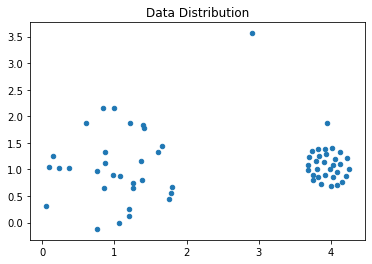

<Figure size 432x432 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data
data_frame = pd.read_csv('cluster_with_outliers.csv')
X = data_frame[['x', 'y']].values
label = data_frame['label'].values

# Data distribution visualization
plt.scatter(X[:, 0], X[:, 1], s=20, cmap='Set1') # Plot data points distribution
plt.title('Data Distribution') 
plt.figure(figsize=(6,6))

## 2 Prototype-based Clustering
Prototype-based clustering uses the K-means algorithm, and the outlier score of a point is computed in two ways: 1) Distance to the closet centroid, 2) Realtive distance.

Text(0.5, 1.0, 'Clustering Result')

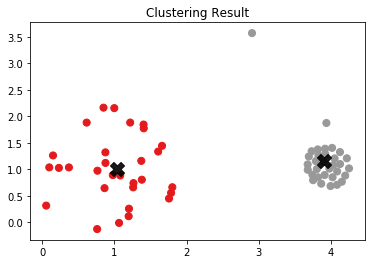

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state= 1) # Set the total number of the cluster, i.e, k,to be 8
# ***Note that for running k-means, the first step is to randomly select several data points as the "initial" center points. 
# ***Thus we fix the random_state to be the random seed 1, such that the results can be reproducible. 

kmeans.fit(X) # Compute k-means clustering
y_kmeans = kmeans.predict(X) # Allocate the data points to a specific cluster
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='Set1') # Plot data points based on the cluster allocation
centers = kmeans.cluster_centers_ # Get cluster center info 
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, alpha=0.9); # Plot the cluseter center as the black X
plt.title('Clustering Result')

## 3 Distance to closest centroid
In this method, the anomaly score of a certain point is calculated by the point's distance from its closet centroid.
### 3.1 Anomaly Score

In [3]:
dist = np.zeros(len(X))
for i, centroid in enumerate(centers):
    # Find the index of all the points belongs to cluster i.
    idx_cluster = np.where(y_kmeans == i)[0] #np.where returns elements chosen from x or y depending on condition.
    
    # Calculate the distance between data points and their centroid
    dist[idx_cluster] = np.linalg.norm((X[idx_cluster] - centroid), axis = 1)

anomaly_score = dist

# Print top predicted outliers
n=10 # also try n=20 to see if there are any errors
anom = pd.DataFrame(anomaly_score, index=data_frame.index, columns=['Anomaly score'])
result = pd.concat((data_frame,anom), axis=1)
result.nlargest(n,'Anomaly score') # -1: outliers, 1: inliers

,x,y,label,Anomaly score
53,2.908733,3.570654,-1,2.612574
52,0.052083,0.313934,1,1.199176
7,0.847563,2.163118,1,1.170147
5,0.759430,-0.128957,1,1.168181
12,0.997325,2.154313,1,1.147440
13,1.063516,-0.013085,1,1.020972
4,0.613960,1.881155,1,0.967984
0,0.094939,1.035539,1,0.935932
1,0.147085,1.260577,1,0.918940
23,1.756452,0.447362,1,0.916882


### 3.2 Visualisation

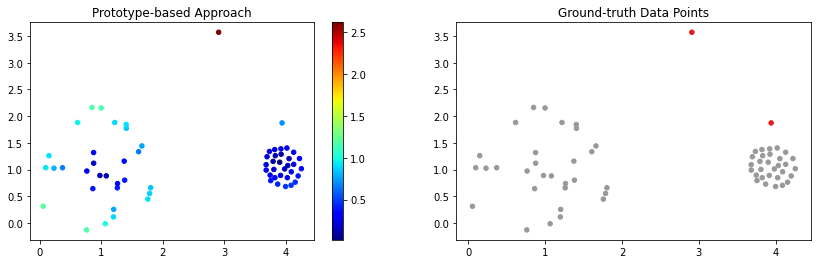

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4)) # Initialize the subplots

axs[0].set_title("Prototype-based Approach")
im1 = axs[0].scatter(data_frame.x,data_frame.y,  s=20, c=anomaly_score,cmap='jet')
fig.colorbar(im1,ax=axs[0])

axs[1].set_title("Ground-truth Data Points")
im2 = axs[1].scatter(data_frame.x,data_frame.y, c=label, s=20, cmap='Set1')

The second outlier has a slightly ligher colour, but comparing to those inliers on the bottom-left, it is still reasonably dark. Besides, its anomaly score is much lower than those inliers (ranked in 20th). Importantly, a number of inliers have very high anomaly scores on the left cluster, which are not preferable.

## 4 Relative distance
In this method, the anomaly score of a certain point is calculated by the point's relative distance from its closet centroid, where the relative distance is the ratio of the point's distance from the centroid to the median distance of all points in the cluster from the centroid. 
### 4.1 Anomaly Score

In [5]:
dist = np.zeros(len(X))
for i, centroid in enumerate(centers):
    # Find the index of all the points belongs to cluster i.
    idx_cluster = np.where(y_kmeans == i)[0]
    # Calculate the distance between data points and their centroid
    dist[idx_cluster] = np.linalg.norm((X[idx_cluster] - centroid), axis = 1)
    # Average distance of all the points in that cluster
    avg_dist = np.mean(dist[idx_cluster])
    # Relative distance
    dist[idx_cluster] = dist[idx_cluster] / avg_dist

anomaly_score = dist

# Print top predicted outliers
n=10 # also try n=20 to see if there are any errors
anom = pd.DataFrame(anomaly_score, index=data_frame.index, columns=['Anomaly score'])
result = pd.concat((data_frame,anom), axis=1)
result.nlargest(n,'Anomaly score') # -1: outliers, 1: inliers

,x,y,label,Anomaly score
53,2.908733,3.570654,-1,7.294277
35,3.940881,1.873537,-1,1.999483
52,0.052083,0.313934,1,1.678423
7,0.847563,2.163118,1,1.637792
5,0.759430,-0.128957,1,1.635041
12,0.997325,2.154313,1,1.606011
13,1.063516,-0.013085,1,1.429001
61,4.087911,0.706090,1,1.354914
4,0.613960,1.881155,1,1.354836
36,3.998243,0.683015,1,1.348324


### 4.2 Visualisation

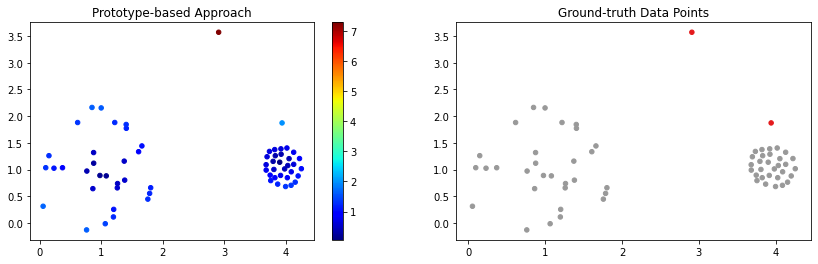

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4)) # Initialize the subplots

axs[0].set_title("Prototype-based Approach")
im1 = axs[0].scatter(data_frame.x,data_frame.y,  s=20, c=anomaly_score,cmap='jet')
fig.colorbar(im1,ax=axs[0])

axs[1].set_title("Ground-truth Data Points")
im2 = axs[1].scatter(data_frame.x,data_frame.y, c=label, s=20, cmap='Set1')

It maybe not very obvious to tell the second outlier has a slightly ligher colour on the plot. However, it has 2nd highest anomaly score. Importantly, those true inliers on the left cluster are not detected as outliers anymore. In summary, the relative distance approach is used to adjust for the large difference in density betwen the compact and loose clusters.